# Aprendizaje no supervisado orientado a sonido

Los algoritmos de machine learning no supervisado descubren en los datos de entrada y de forma autónoma: características, regularidades, correlaciones y categorías


## Imports

In [0]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

import pandas as pd
import altair as alt

## Bajar el conjunto de datos

In [1]:
!gdown http://audiostellar.xyz/downloads/audiostellar-default-session.zip
!unzip audiostellar-default-session.zip

Downloading...
From: http://audiostellar.xyz/downloads/audiostellar-default-session.zip
To: /content/audiostellar-default-session.zip
100% 16.2M/16.2M [00:02<00:00, 7.49MB/s]
Archive:  audiostellar-default-session.zip
   creating: drumkits.mp3/
  inflating: drumkits.mp3/session.drumkits.json  
   creating: drumkits.mp3/Rhythm-Ace/
  inflating: drumkits.mp3/Rhythm-Ace/Hat Open.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Bassdrum-02.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Snaredrum-01.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Percussion-04.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Percussion-01.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Snaredrum-02.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Tom L.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Clave.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Tom H.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Hat Closed.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Percussion-02.mp3  
  inflating: drumkits.mp3/Rhythm-Ace/Bassdrum-03.mp3  
  inflating: drumkits

In [3]:
!ls drumkits.mp3

'AJK Percussion Synth'	   'Roland D-110'
'Akai Linndrum'		   'Roland D-70'
'Akai MPC-60'		   'Roland Digital Drum Brain DDR-30'
'Akai  XR-10'		   'Roland JD-990'
'Alesis HR-16'		   'Roland MC-202'
'Alesis SR-16'		   'Roland MC-303'
'Boss DR-110'		   'Roland MT-32'
'Boss DR-220'		   'Roland R8'
'Boss DR-55'		   'Roland S50'
'Boss DR-550'		   'Roland SH-09'
'Casio RZ-1'		   'Roland System-100'
'Casio SK-1'		   'Roland TR-505'
'Casio VL-1'		   'Roland TR-606'
'Doepfer MS-404'	   'Roland TR-626'
'Emu Drumulator'	   'Roland TR-707'
'Emu Modular'		   'Roland TR-727'
'Emu SP12'		   'Roland TR-808'
'Korg DDM110'		   'Roland TR-909'
'Korg KPR-77'		   'Sakata DPM-48'
'Korg KR-55'		   'Sequential Circuits Drumtraks'
'Korg KRZ'		   'Sequential Circuits TOM'
'Korg M1'		   'Serge Modular'
'Korg Minipops'		    session.drumkits.json
'Korg Poly-800'		   'Simmons SDS-400'
'Korg T3'		   'Simmons SDS-5'
'Linn 9000'		   'Sound Master, Memory Rhythm SR-88'
'Linn LinnDrum'		   'Univox Microrhythmer-12'
 MFB-

## Elegimos algunos sonidos

In [0]:
drums = [
  "drumkits.mp3/Roland TR-808/Bassdrum-01.mp3",
  "drumkits.mp3/Roland TR-808/Snaredrum.mp3",
  "drumkits.mp3/Roland TR-808/Crash-01.mp3",
  
  "drumkits.mp3/Roland TR-909/Bassdrum-01.mp3",
  "drumkits.mp3/Roland TR-909/naredrum.mp3",
  "drumkits.mp3/Roland TR-909/Crash.mp3",

  "drumkits.mp3/Boss DR-110/Bassdrum.mp3",
  "drumkits.mp3/Boss DR-110/Snaredrum.mp3",
  "drumkits.mp3/Boss DR-110/Crash.mp3",
]

## ¿Cómo son esos sonidos?

In [13]:
for d in drums:
    display(d)
    display( ipd.Audio(d) )

'drumkits.mp3/Roland TR-808/Bassdrum-01.mp3'

'drumkits.mp3/Roland TR-808/Snaredrum.mp3'

'drumkits.mp3/Roland TR-808/Crash-01.mp3'

'drumkits.mp3/Roland TR-909/Bassdrum-01.mp3'

'drumkits.mp3/Roland TR-909/naredrum.mp3'

'drumkits.mp3/Roland TR-909/Crash.mp3'

'drumkits.mp3/Boss DR-110/Bassdrum.mp3'

'drumkits.mp3/Boss DR-110/Snaredrum.mp3'

'drumkits.mp3/Boss DR-110/Crash.mp3'

In [18]:
plt.figure(figsize=(20, 12))
for i in range(1,10):
    plt.subplot(3, 3, i)
    
    wave, sr = librosa.load( drums[i-1] )
    #librosa.display.waveplot(wave)
    plt.plot(wave)
    plt.title(drums[i-1])

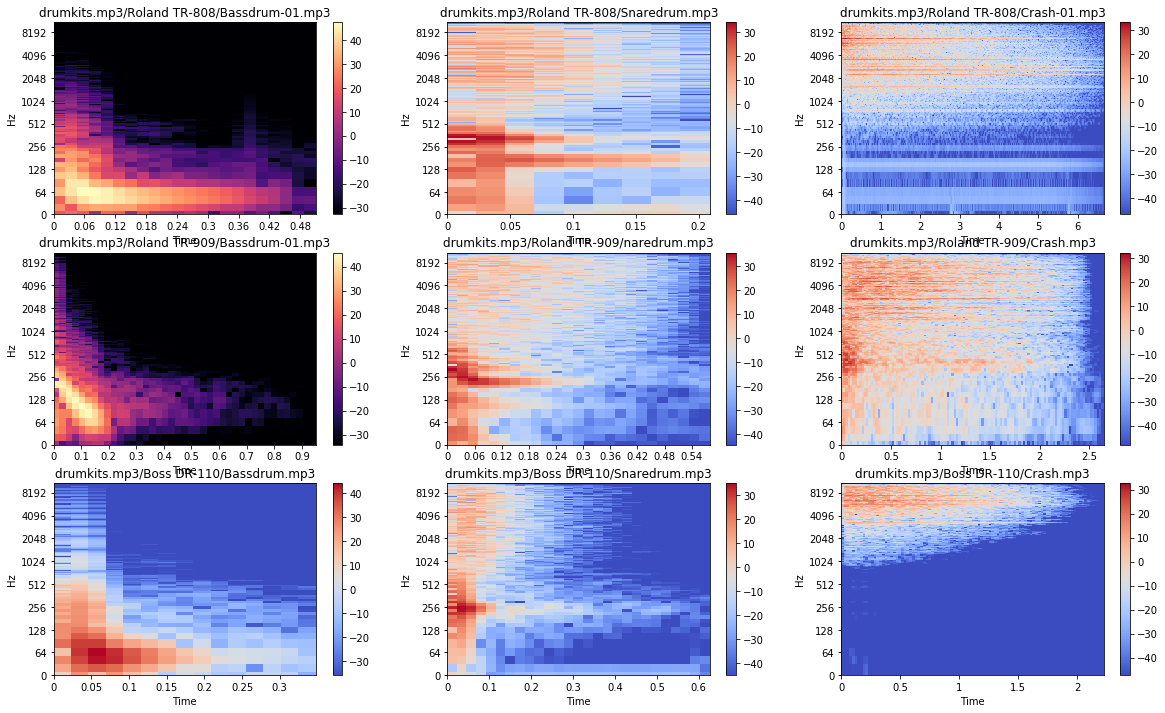

In [20]:
plt.figure(figsize=(20, 12))
for i in range(1,10):
    plt.subplot(3, 3, i)
    
    wave, sr = librosa.load( drums[i-1] )
    waveSTFT = librosa.stft(wave, n_fft=1024)
    wavedb = librosa.amplitude_to_db(abs(waveSTFT))
    librosa.display.specshow(wavedb, sr=sr, x_axis='time', y_axis='log')
    plt.title(drums[i-1])
    plt.colorbar()

## Reducción de dimensionalidad

Este es el archivo que usa [AudioStellar](http://audiostellar.xyz) para procesar

In [21]:
!gdown https://gitlab.com/i3a/clases/raw/master/no_supervisado/utils.py
import utils

Downloading...
From: https://gitlab.com/i3a/clases/raw/master/no_supervisado/utils.py
To: /content/utils.py
100% 6.89k/6.89k [00:00<00:00, 14.6MB/s]


Tiene algunas utilidades para simplificar el proceso. Por ejemplo:

In [25]:
audioFiles = utils.findMusic( "drumkits.mp3/" )
print("Encontré {} archivos de audio".format( len(audioFiles) ))

Skipped: drumkits.mp3/session.drumkits.json
Encontré 2128 archivos de audio


El proceso tarda bastante, entonces vamos a tomar una muestra de los 2128 para hacer más rápido. La muestra será de 400 audios.

In [40]:
audioFilesSample = list ( np.random.choice( audioFiles, size = 500 ) )
len(audioFilesSample)

500

### Ok, vamos a extraer features de esos 300 audios

In [41]:
audioData = utils.getAudioData( audioFilesSample, "stft", audioMaxLength = 1 )

........................................................................................................................................................................................................
[ 200 / 500 ]
........................................................................................................................................................................................................
[ 400 / 500 ]
....................................................................................................
Matriz final: (500, 45100)
time: 47.429496


In [42]:
display(audioData.shape)
display(audioData[0].shape)

(500, 45100)

(45100,)

**¿Por qué no es una matriz STFT como la que habíamos visto antes?**

Porque esa función ejecuta el algoritmo de STFT pero además _vectoriza_ la matriz para que sea posible ejecutar los algoritmos que vienen a continuación



### Análisis de componentes principales

Esta técnica sirve para reducir la altísima dimensionalidad con la que estamos trabajando. PCA sólo funciona cuando nuestras variables están correlacionadas y tiene la ventaja de informarnos que porcentaje de la variabilidad original explican las nuevas variables 

In [43]:
audioDataTransformed = utils.doPCA(audioData)

Variance explained: 0.9800633
shape transformed: (500, 213)
time: 13.37749599999998


In [64]:
dataset = pd.DataFrame({'PCA_1': audioDataTransformed[:, 0], 'PCA_2': audioDataTransformed[:, 1], "Filename" : audioFilesSample })

alt.Chart(dataset,width=800, height=500).mark_circle().encode(
    x="PCA_1",
    y="PCA_2",
    tooltip=['Filename']
).interactive()

alt.Chart(...)

In [55]:
dataset.head()

PCA_1      PCA_2                                      Filename
0  118.759232 -29.030123   drumkits.mp3/Yamaha RM 50/Toms/TOMS_108.mp3
1  601.638000 -73.928535     drumkits.mp3/Roland SH-09/Bassdrum-11.mp3
2 -141.069733  12.279514       drumkits.mp3/Roland JD-990/Digibels.mp3
3 -149.342377 -39.864155    drumkits.mp3/Roland S50/Percusson/Wblk.mp3
4 -160.061554 -45.179718  drumkits.mp3/Sakata DPM-48/Hat Closed-01.mp3

### t-SNE

t-distributed Stochastic Neighbour Embedding también es un algoritmo de reducción de dimensionalidad pero está pensado especialmente para visualización de datos

In [58]:
utils.doDistanceMatrix( audioDataTransformed )
tsne = utils.doTSNE( audioDataTransformed, 2 )
tsne.shape

Processing distance matrix...
Distance function: cosine
time: 0.025253999999989674
time: 3.3219660000000033


(500, 2)

In [63]:
dataset = pd.DataFrame({'TSNE_1': tsne[:, 0], 'TSNE_2': tsne[:, 1], "Filename" : audioFilesSample })

alt.Chart(dataset, width=800, height=500).mark_circle().encode(
    x="TSNE_1",
    y="TSNE_2",
    tooltip=['Filename']
).interactive()

alt.Chart(...)